# Chequeo configuración del entorno

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_4.2.1


In [3]:
!python -VV

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [4]:
import IPython 
print(IPython.sys_info())
%who_ls

{'commit_hash': '2eec187d3',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python3.7/dist-packages/IPython',
 'ipython_version': '7.9.0',
 'os_name': 'posix',
 'platform': 'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'}


['IPython']

In [5]:
import pandas as pd
# pip show pd
print(pd.__version__)

1.3.5


# Lectura de datos

In [6]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# convertir con el bloc de notas de ANSI a UTF-8
babies = pd.read_csv('/content/gdrive/MyDrive/Maestría Estadística/Modelos Lineales/Tallas.babies.csv', sep = ';', decimal=",")

In [8]:
#%%R
#library(readr)
#babies<-read.table('/content/gdrive/MyDrive/Maestría Estadística/Modelos Lineales/Tallas.babies.csv', header=T, sep=";")

In [9]:
babies.dtypes

Talla.hoy      float64
Edad.días        int64
Talla_nacer    float64
Peso_nacer     float64
Tórax_nacer    float64
dtype: object

In [10]:
%R -i babies

In [11]:
%%R
str(babies)

'data.frame':	7 obs. of  5 variables:
 $ Talla.hoy  : num  57.5 52.8 61.3 67 53.5 62.7 56.2
 $ Edad.días  : int  78 69 77 88 67 80 74
 $ Talla_nacer: num  48.2 45.5 46.3 49 43 48 48
 $ Peso_nacer : num  2.75 2.15 4.41 5.52 3.21 4.32 2.31
 $ Tórax_nacer: num  29.5 26.3 32.2 36.5 27.2 27.7 28.3


In [12]:
%%R
fx = list(attach, head, summary, dim)
lapply(fx, function(f) f(babies))

[[1]]
<environment: 0x63e4468>
attr(,"name")
[1] "babies"

[[2]]
  Talla.hoy Edad.días Talla_nacer Peso_nacer Tórax_nacer
0      57.5        78        48.2       2.75        29.5
1      52.8        69        45.5       2.15        26.3
2      61.3        77        46.3       4.41        32.2
3      67.0        88        49.0       5.52        36.5
4      53.5        67        43.0       3.21        27.2
5      62.7        80        48.0       4.32        27.7

[[3]]
   Talla.hoy       Edad.días      Talla_nacer      Peso_nacer   
 Min.   :52.80   Min.   :67.00   Min.   :43.00   Min.   :2.150  
 1st Qu.:54.85   1st Qu.:71.50   1st Qu.:45.90   1st Qu.:2.530  
 Median :57.50   Median :77.00   Median :48.00   Median :3.210  
 Mean   :58.71   Mean   :76.14   Mean   :46.86   Mean   :3.524  
 3rd Qu.:62.00   3rd Qu.:79.00   3rd Qu.:48.10   3rd Qu.:4.365  
 Max.   :67.00   Max.   :88.00   Max.   :49.00   Max.   :5.520  
  Tórax_nacer   
 Min.   :26.30  
 1st Qu.:27.45  
 Median :28.30  
 Mean 

In [ ]:
%%R
libs = list("MASS", "lmtest", "nortest")
lapply(libs, function(x) install.packages(x))

In [14]:
%%R
library(MASS)
library(lmtest)
library(nortest)


Attaching package: ‘zoo’



    as.Date, as.Date.numeric




# Ajuste del modelo lineal

In [15]:
%%R
baby.fit11 = lm(Talla.hoy ~ Tórax_nacer, data = babies) # 1) AJUSTAR EL MODELO 
baby.fit11     ### 2) COEFICIENTES ESTIMADOS bo y b1


Call:
lm(formula = Talla.hoy ~ Tórax_nacer, data = babies)

Coefficients:
(Intercept)  Tórax_nacer  
     23.035        1.202  



In [16]:
%%R
resid.torax<-residuals(baby.fit11)  ### Residuales (errores estimados)
resid.torax

          0           1           2           3           4           5 
-1.00814515 -1.86018799 -0.45485900  0.07444856 -2.24242594  6.35633075 
          6 
-0.86516122 


# Validación de supuestos
No hay normalidad, no hay varianza constante, sí independencia

+ **Normalidad**

En este caso en ambas pruebas de normalidad rechazo la hipótesis nula, es decir no hay evidencia estadísticamente significativa a favor de la normalidad de los residuales.

In [17]:
%%R 
# https://rpubs.com/MSiguenas/122473
# H0: La muestra proviene de una distribución normal.
# H1: La muestra no proviene de una distribución normal.
test_normal = c(shapiro.test, lillie.test) # ad.test, cvm.test, pearson.test, sf.test
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
lapply(test_normal, function(f) f(residuals(baby.fit11)))

[[1]]

	Shapiro-Wilk normality test

data:  residuals(baby.fit11)
W = 0.71296, p-value = 0.005126


[[2]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(baby.fit11)
D = 0.34694, p-value = 0.0109




In [18]:
%R -o resid_babies  resid_babies <- residuals(baby.fit11)
# https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
from scipy.stats import shapiro
import statsmodels.stats.diagnostic as smd

D, p_value_D = shapiro(resid_babies)
print('stat=%.3f, p=%.3f\n' % (D, p_value_D))

W, p_value_W = smd.lilliefors(resid_babies)
print('stat=%.3f, p=%.3f\n' % (W, p_value_W))

stat=0.713, p=0.005

stat=0.347, p=0.011



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


+ **Homocedasticidad**

En el caso de la prueba de *Goldfeld-Quandt* rechazo la hipótesis nula, es decir no hay evidencia a favor del supuesto de varianza constante.

In [19]:
%%R
# H0: existe homocedasticidad 
# H1: no existe homocedasticidad (existe heterocedasticidad)
test_hmcd = c(bptest, gqtest) 
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
#lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Tórax_nacer)))
lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Tórax_nacer)))

[[1]]

	studentized Breusch-Pagan test

data:  lm(Talla.hoy ~ Tórax_nacer)
BP = 0.76806, df = 1, p-value = 0.3808


[[2]]

	Goldfeld-Quandt test

data:  lm(Talla.hoy ~ Tórax_nacer)
GQ = 3985.4, df1 = 2, df2 = 1, p-value = 0.0112
alternative hypothesis: variance increases from segment 1 to 2




In [20]:
# https://www.datascienceconcepts.com/tutorials/python-programming-language/heteroskedasticity-breusch-pagan-and-white-tests-in-python/
# https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab

#import statsmodels.api as sm # datasets.get_rdataset
import statsmodels.formula.api as smf # ols
import statsmodels.tools.tools as smt # add_constant

babies.rename(columns = {'Talla.hoy':'Talla_hoy'}, inplace = True)
mlr = smf.ols(formula = "Talla_hoy ~ Tórax_nacer", data=babies).fit()

ivar = babies.iloc[:, 4]
ivarc = smt.add_constant(data=ivar, prepend=True)

bptest = smd.het_breuschpagan(resid=mlr.resid, exog_het = ivarc)
white_test = smd.het_white(mlr.resid,  ivarc)

print("BP:", bptest[0], "pvalue:", bptest[1])
print("W:", white_test[0], "pvalue:", white_test[1])

BP: 0.7680594833927342 pvalue: 0.3808180368959512
W: 0.78707900797567 pvalue: 0.6746646651057131


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


+ **Independencia**

In [21]:
%%R
# H0: Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)
# Ha: Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)
dwtest(Talla.hoy ~ residuals(baby.fit11)) # Durbin Watson independencia


	Durbin-Watson test

data:  Talla.hoy ~ residuals(baby.fit11)
DW = 1.9745, p-value = 0.5918
alternative hypothesis: true autocorrelation is greater than 0



In [22]:
import numpy as np
from statsmodels.stats.stattools import durbin_watson

durbin_watson(mlr.resid)
# durbin_watson(resids=np.array(mlr.resid)) #2.642818348323787

2.642818348323787

# Ajuste de otro modelo lineal

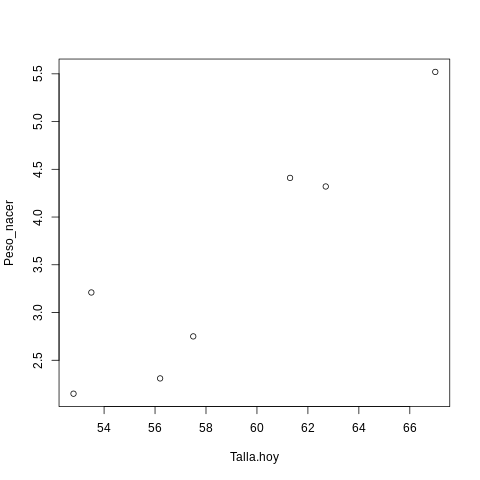

In [23]:
%%R
plot(Talla.hoy,Peso_nacer)

In [24]:
%%R
baby.fit12<-lm(Talla.hoy~Peso_nacer) # 1) AJUSTAR EL MODELO 
baby.fit12   


Call:
lm(formula = Talla.hoy ~ Peso_nacer)

Coefficients:
(Intercept)   Peso_nacer  
     45.396        3.779  



In [25]:
%%R
resid.peso<-residuals(baby.fit12)  ### Residuales (errores estimados)
resid.peso

         1          2          3          4          5          6          7 
 1.7118039 -0.7207465 -0.7614731  0.7437452 -4.0265740  0.9786443  2.0746003 


# Validación de supuestos
Cumple los tres supuestos!!!

+ **Normalidad**

In [26]:
%%R 
# https://rpubs.com/MSiguenas/122473
# H0: La muestra proviene de una distribución normal.
# H1: La muestra no proviene de una distribución normal.
test_normal = c(shapiro.test, lillie.test) # ad.test, cvm.test, pearson.test, sf.test
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
lapply(test_normal, function(f) f(residuals(baby.fit12)))

[[1]]

	Shapiro-Wilk normality test

data:  residuals(baby.fit12)
W = 0.88086, p-value = 0.2303


[[2]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(baby.fit12)
D = 0.21455, p-value = 0.426




In [27]:
%R -o resid_babies  resid_babies <- residuals(baby.fit12)
# https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

D, p_value_D = shapiro(resid_babies)
print('stat=%.3f, p=%.3f\n' % (D, p_value_D))

W, p_value_W = smd.lilliefors(resid_babies)
print('stat=%.3f, p=%.3f\n' % (W, p_value_W))

stat=0.881, p=0.230

stat=0.215, p=0.200



+ **Homocedasticidad**

In [28]:
%%R
# H0: existe homocedasticidad 
# H1: no existe homocedasticidad (existe heterocedasticidad)
test_hmcd = c(bptest, gqtest) 
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
#lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Tórax_nacer)))
lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Peso_nacer)))

[[1]]

	studentized Breusch-Pagan test

data:  lm(Talla.hoy ~ Peso_nacer)
BP = 0.45326, df = 1, p-value = 0.5008


[[2]]

	Goldfeld-Quandt test

data:  lm(Talla.hoy ~ Peso_nacer)
GQ = 2.9412, df1 = 2, df2 = 1, p-value = 0.3812
alternative hypothesis: variance increases from segment 1 to 2




In [29]:
mlr = smf.ols(formula = "Talla_hoy ~ Peso_nacer", data=babies).fit()

ivar = babies.iloc[:, 3]
ivarc = smt.add_constant(data=ivar, prepend=True)

bptest = smd.het_breuschpagan(resid=mlr.resid, exog_het = ivarc)
white_test = smd.het_white(mlr.resid,  ivarc)

print("BP:", bptest[0], "pvalue:", bptest[1])
print("W:", white_test[0], "pvalue:", white_test[1])

BP: 0.4532623119548911 pvalue: 0.5007897920143562
W: 1.6133747173757211 pvalue: 0.4463341649741599


+ **Independencia**

In [30]:
%%R
# H0: Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)
# Ha: Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)
dwtest(Talla.hoy ~ residuals(baby.fit12)) # Durbin Watson independencia


	Durbin-Watson test

data:  Talla.hoy ~ residuals(baby.fit12)
DW = 1.8292, p-value = 0.4162
alternative hypothesis: true autocorrelation is greater than 0



In [31]:
durbin_watson(mlr.resid)
# durbin_watson(resids=np.array(mlr.resid)) #2.642818348323787

2.194890388965987

# Ajuste de otro modelo lineal

In [32]:
%%R
baby.fit13<-lm(Talla.hoy~Talla_nacer) # 1) AJUSTAR EL MODELO 
baby.fit13   ### 2) COEFICIENTES ESTIMADOS bo y b1


Call:
lm(formula = Talla.hoy ~ Talla_nacer)

Coefficients:
(Intercept)  Talla_nacer  
    -21.377        1.709  



In [33]:
%%R
resid.3<-residuals(baby.fit13)  ### Residuales (errores estimados)
resid.3

        1         2         3         4         5         6         7 
-3.509580 -3.594574  3.538017  4.623011  1.378580  2.032273 -4.467727 


# Validación de supuestos
Cumple los tres supuestos !!!

+ **Normalidad**

In [34]:
%%R 
# https://rpubs.com/MSiguenas/122473
# H0: La muestra proviene de una distribución normal.
# H1: La muestra no proviene de una distribución normal.
test_normal = c(shapiro.test, lillie.test) # ad.test, cvm.test, pearson.test, sf.test
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
lapply(test_normal, function(f) f(residuals(baby.fit13)))

[[1]]

	Shapiro-Wilk normality test

data:  residuals(baby.fit13)
W = 0.8705, p-value = 0.1875


[[2]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(baby.fit13)
D = 0.25285, p-value = 0.1924




In [ ]:
%%R
install.packages("ggpubr")

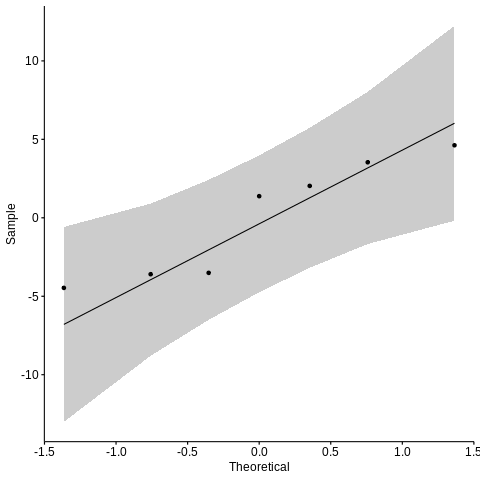

In [36]:
%%R
#ggpubr::ggdensity(residuals(baby.fit13), main = "Density plot of resid", xlab = "resid")
ggpubr::ggqqplot(residuals(baby.fit13)) 

In [37]:
%R -o resid_babies  resid_babies <- residuals(baby.fit13)
# https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

D, p_value_D = shapiro(resid_babies)
print('stat=%.3f, p=%.3f\n' % (D, p_value_D))

W, p_value_W = smd.lilliefors(resid_babies)
print('stat=%.3f, p=%.3f\n' % (W, p_value_W))

stat=0.871, p=0.188

stat=0.253, p=0.196



+ **Homocedasticidad**

In [38]:
%%R
# H0: existe homocedasticidad 
# H1: no existe homocedasticidad (existe heterocedasticidad)
test_hmcd = c(bptest, gqtest) 
# ?ad.test # x: a numeric vector of data values, the number of which must be greater than 7.
#lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Tórax_nacer)))
lapply(test_hmcd, function(f) f(lm(Talla.hoy~ Talla_nacer)))

[[1]]

	studentized Breusch-Pagan test

data:  lm(Talla.hoy ~ Talla_nacer)
BP = 2.8633, df = 1, p-value = 0.09062


[[2]]

	Goldfeld-Quandt test

data:  lm(Talla.hoy ~ Talla_nacer)
GQ = 0.6911, df1 = 2, df2 = 1, p-value = 0.6479
alternative hypothesis: variance increases from segment 1 to 2




In [39]:
mlr = smf.ols(formula = "Talla_hoy ~ Talla_nacer", data=babies).fit()

ivar = babies.iloc[:, 2]
ivarc = smt.add_constant(data=ivar, prepend=True)

bptest = smd.het_breuschpagan(resid=mlr.resid, exog_het = ivarc)
white_test = smd.het_white(mlr.resid,  ivarc)

print("BP:", bptest[0], "pvalue:", bptest[1])
print("W:", white_test[0], "pvalue:", white_test[1])

BP: 2.8633312597978975 pvalue: 0.09061965054784181
W: 2.8859616157198076 pvalue: 0.23622257408884487


+ **Independencia**

In [40]:
%%R
# H0: Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)
# Ha: Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)
dwtest(Talla.hoy ~ residuals(baby.fit13)) # Durbin Watson independencia


	Durbin-Watson test

data:  Talla.hoy ~ residuals(baby.fit13)
DW = 2.9274, p-value = 0.8926
alternative hypothesis: true autocorrelation is greater than 0



In [41]:
durbin_watson(mlr.resid)
# durbin_watson(resids=np.array(mlr.resid)) #2.642818348323787

1.2366428021402116

# Interpretación de los coeficientes

In [42]:
# ¿Existe modelo de RLS?
%%R
anova(baby.fit12) ### SÍ SE PUEDE INTERPRETAR LA PENDIENTE.

Analysis of Variance Table

Response: Talla.hoy
           Df  Sum Sq Mean Sq F value   Pr(>F)   
Peso_nacer  1 135.131 135.131  25.929 0.003796 **
Residuals   5  26.058   5.212                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [43]:
%%R
qf(0.99,1,5)

[1] 16.25818


In [44]:
%%R
summary(baby.fit12)


Call:
lm(formula = Talla.hoy ~ Peso_nacer)

Residuals:
      1       2       3       4       5       6       7 
 1.7118 -0.7207 -0.7615  0.7437 -4.0266  0.9786  2.0746 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45.3957     2.7542  16.482  1.5e-05 ***
Peso_nacer    3.7791     0.7422   5.092   0.0038 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.283 on 5 degrees of freedom
Multiple R-squared:  0.8383,	Adjusted R-squared:  0.806 
F-statistic: 25.93 on 1 and 5 DF,  p-value: 0.003796



In [46]:
%%R
summary(Peso_nacer) ### ¿tiene sentido interpretar bo estimado?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.150   2.530   3.210   3.524   4.365   5.520 
